In [28]:
#Importing required libraries 

#pandas is used to create a dataframe out of the dataset
import pandas as pd

#numpy is used to handle numerical and mathematical operations
import numpy as np

# Train_test_split package is used to split the training and testing data from the dataset
from sklearn.model_selection import train_test_split

# Importing the supervised learning classifier that is used  to create a random forest
from sklearn.ensemble import RandomForestClassifier

# accuracy_score is used to calculate the accuracy of the classifier
from sklearn.metrics import accuracy_score

# cross_val_score library calculates the accuracy of the cross validation set
from sklearn.model_selection import cross_val_score

# Used to generate the classification report
from sklearn.metrics import classification_report

# To get the statistics between the test and predicted labels via a confusion matrix
from sklearn.metrics import confusion_matrix

# Provides an interface to generate statiscal visualization
import seaborn as sns; sns.set()

# Matplotlib library is used to plot the 2 D graphs
import matplotlib.pyplot as plt

# Configuring the PATH to the graphviz
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# graphviz and pydot packages are used to visualize the decision trees
from sklearn.tree import export_graphviz

import pydot

In [29]:
#Load the data from the CSV file and add to the pandas dataframe variable 'dataset' 
dataset = pd.read_csv('C:\\Users\\KAVII\\Desktop\\IT16133914\\Data_Set\\column_2C_weka.csv',header=0)

# Getting to know the data
# dataset.head()
# dataset.info()
# dataset.describe()

#Get and print the first 5 rows of the dataframe
dataset.head(5)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal

In [30]:
#Apply One Hot Encode to the categorical column 'class'
dataset = pd.get_dummies(dataset,columns=['class'])
#Remove 'class_Normal' column to eliminate redundancy
dataset.drop("class_Normal",axis = 1, inplace = True) 

dataset.head(5)

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  class_Abnormal  
0      98.672917                 -0.254400               1  
1     114.405425                  4.564259               1  
2     105.985135                 -3.530317               1  
3     101.868495                 11.211523               1  
4     108.168725                  7.918501               1

In [31]:
#Seperate labels and features from the dataset

# labels variable contains only the class_Abnormal column of the dataset
# labels is a 1 D array
labels = np.array(dataset['class_Abnormal'])

# features variable contains all data without the class_Abnormal column
features = dataset.drop('class_Abnormal', axis = 1)

# Saving the column headings of feature data(feature names)
feature_list = list(features.columns) 
#Saving the names of labels data(label names)
target_list = ['Normal', 'Abnormal']


#For testing purpose 
#train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 42)

#Splitting the dataset into training sets and testing sets 
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.25,random_state = 1) 

print ('Shape of training features(x_train shape): {} '.format(x_train.shape))
print ('Shape of training labels(y_train shape): {} '.format(y_train.shape))
print ('Shape of testing features(x_test shape): {} '.format(x_test.shape))
print ('Shape of testing labels(y_test shape): {} '.format(y_test.shape))

# Using the RandomForestClassifier create a random forest with 100 decision trees 
# RFC_model = RandomForestClassifier(n_estimators= 150)
RFC_model = RandomForestClassifier(n_estimators=150,random_state = 4) 

#Training the Random Forest Classifier using the training data 
RFC_model.fit(x_train, y_train)

#Perform prediction on the test set using the classifier
y_pred = RFC_model.predict(x_test)

#temp
# predictions = RFC.predict(test_features)

# Finding the Model Accuracy by comparing the training values 
train_accuracy_RFC = 100 * RFC_model.score(x_train,y_train)

#Print Train Accuracy
print("The accuracy of the RFC_model on training data: " + str(train_accuracy_RFC))

# Finding the Model Accuracy by comparing the test values with the predicted data values 
test_accuracy_RFC = 100 * accuracy_score(y_test, y_pred)
#RFC_test_accuracy = RFC_model.score(x_test,y_test)

#Print Test Accuracy
print ("The accuracy of the RFC_model on testing data: " + str(test_accuracy_RFC))

# Get and print cross validation score of the dataset using the 10 fold cross validation
scores = cross_val_score(RFC_model, features, labels,cv=10) 
print("The average accuracy of 10-fold cross validation: " + str(scores.mean()*100.0) ) 

Shape of training features(x_train shape): (232, 6) 
Shape of training labels(y_train shape): (232,) 
Shape of testing features(x_test shape): (78, 6) 
Shape of testing labels(y_test shape): (78,) 
The accuracy of the RFC_model on training data: 100.0
The accuracy of the RFC_model on testing data: 88.46153846153845
The average accuracy of 10-fold cross validation: 81.29032258064515


Classification Report: 
               precision    recall  f1-score   support

      Normal       0.85      0.74      0.79        23
    Abnormal       0.90      0.95      0.92        55

   micro avg       0.88      0.88      0.88        78
   macro avg       0.87      0.84      0.86        78
weighted avg       0.88      0.88      0.88        78

Confusion matrix: 
 [[17  6]
 [ 3 52]]


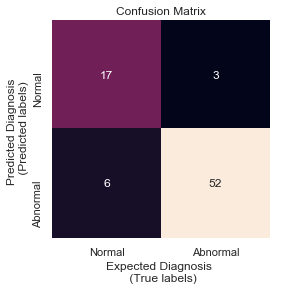

In [32]:
#Print the Classification Report showing the predicted values
print('Classification Report: \n',classification_report(y_test,y_pred,target_names=target_list))

#Create and print the Confusion Matrix by comparing predicted values with the test values
cMatrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cMatrix)

subGraph= plt.subplot() 

# Creation of a heat map to visualize the matrix
sns.heatmap(cMatrix.T, square=True, annot=True,fmt='d', cbar=False, ax=subGraph) 

# Naming the x and y axis
subGraph.set_xlabel('Expected Diagnosis \n (True labels)') 
subGraph.set_ylabel('Predicted Diagnosis \n (Predicted labels)')

# Setting title
subGraph.set_title('Confusion Matrix');  

# Setting the class labels for both x and y axis
subGraph.xaxis.set_ticklabels(['Normal', 'Abnormal']); 
subGraph.yaxis.set_ticklabels(['Normal', 'Abnormal']); 



#Retrieve one tree from the forest
sampleTree = RFC_model.estimators_[5]

# Exporting the retrieved decision tree to a dot file
export_graphviz(sampleTree, out_file = 'DecisionTree.dot', feature_names = feature_list, rounded = True, precision = 1) 

# Using dot file generate the graph 
(graph, ) = pydot.graph_from_dot_file('DecisionTree.dot') 

# Convert the dot file to png format 
graph.write_png('DecisionTree.png')

# Limiting the depth a tree to 4 levels 
RFC_model_limit = RandomForestClassifier(n_estimators=150, max_depth = 4) 
RFC_model_limit.fit(x_train, y_train)

# Retrieve the small tree 
sampleTreeLimited = RFC_model_limit.estimators_[5]

# Saving the tree as a png
export_graphviz(sampleTreeLimited, out_file = 'SmallDecisionTree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('SmallDecisionTree.dot') 
graph.write_png('SmallDecisionTree.png');

No handles with labels found to put in legend.


sacral_slope                0.123079
pelvic_tilt numeric         0.129232
pelvic_radius               0.126711
pelvic_incidence            0.115746
lumbar_lordosis_angle       0.175333
degree_spondylolisthesis    0.329900
dtype: float64


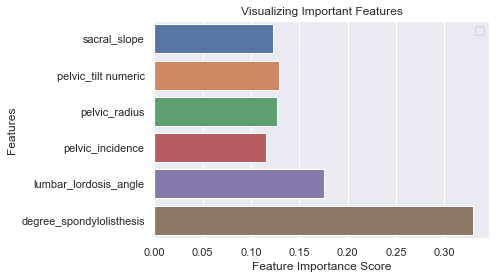

In [33]:
#Plotting the feature importance

featureImp = pd.Series(RFC_model.feature_importances_,index=features.columns.sort_values(ascending=False))

print(featureImp)

%matplotlib inline
# Creating a bar plot
sns.barplot(x=featureImp, y=featureImp.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [34]:
# PCA is used to reduce the dimension of the dataset
from sklearn.decomposition import PCA

# 95% of variance is maintained when choosing the minimum number of principal components  
pca = PCA(0.95) 

# Fitting the features data and applying transform 
principalComponents = pca.fit_transform(features) 

# Getting the components into a data frame 
pcaDf = pd.DataFrame(data = principalComponents)
    
# Adding the result column 
finalDf = pd.concat([pcaDf, dataset[['class_Abnormal']]], axis = 1) 

# Viewing the first 5 rows of the final dataframe 
finalDf.head(5)

0          1          2          3  class_Abnormal
0 -25.218204 -13.201625  15.887902  14.093195               1
1 -37.549924  18.957805  11.843518   2.122704               1
2 -21.948937 -23.068403   6.323359   8.944236               1
3 -10.845081 -13.918144  12.972879  13.900793               1
4 -27.734023   7.587755  18.436964   1.447676               1